In [2]:
import matplotlib.pyplot as plt
import pandas as pd

'positive': 2, 'negative': 5, 'neutral': 11
{'positive': 2, 'negative': 5, 'neutral': 11}


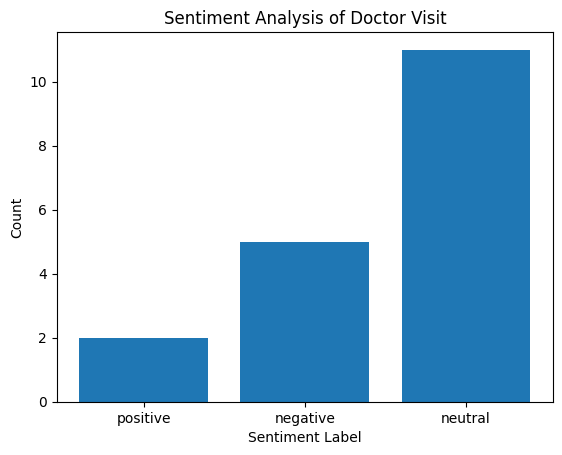

In [14]:
with open('SpeechAnalysis\sentiment-doc-pat.txt', 'r') as f:
    lines = f.readlines()
data = lines[-1].split("FINAL COUNTS: ")[1][1:-1]
print(data)
data = data.replace("'", "")
data = data.split(", ")
data = {x.split(": ")[0]: int(x.split(": ")[1]) for x in data}
print(data)
labels = list(data.keys())
counts = list(data.values())

plt.bar(range(len(data)), counts, tick_label=labels)
plt.title("Sentiment Analysis of Doctor Visit")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()


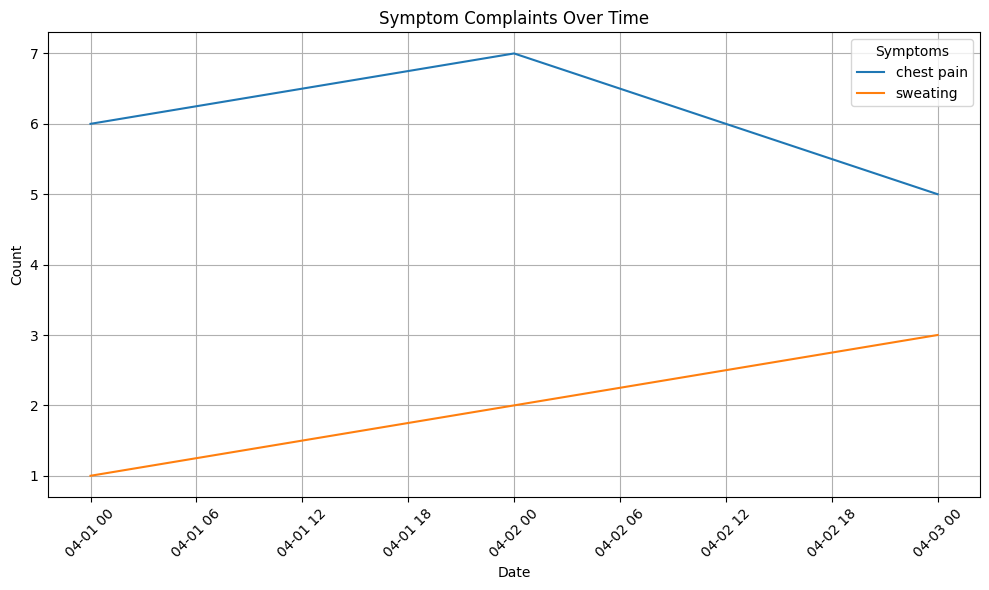

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example Data
patient_data = [
    {
        "date": "2025-04-01",
        "patient_symptoms": [
            {"symptom": "chest pain", "count": 6},
            {"symptom": "sweating", "count": 1}
        ]
    },
    {
        "date": "2025-04-02",
        "patient_symptoms": [
            {"symptom": "chest pain", "count": 7},
            {"symptom": "sweating", "count": 2}
        ]
    },
    {
        "date": "2025-04-03",
        "patient_symptoms": [
            {"symptom": "chest pain", "count": 5},
            {"symptom": "sweating", "count": 3}
            {"symptom": "nausea", "count": 1}
        ]
    }
]

# Convert to DataFrame
data_rows = []

# Flatten the data into a list of dictionaries
for entry in patient_data:
    date = entry['date']
    for symptom in entry['patient_symptoms']:
        data_rows.append({
            'date': date,
            'symptom': symptom['symptom'],
            'count': symptom['count']
        })

df = pd.DataFrame(data_rows)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Pivot the DataFrame to have a column for each symptom
df_pivot = df.pivot_table(index='date', columns='symptom', values='count', aggfunc='sum').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each symptom's count over time
for symptom in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[symptom], label=symptom)

plt.title('Symptom Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Symptoms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
